# MACHINE LEARNING USE CASES

## Customer Churn Prediction

Churn prediction, or the task of identifying customers who are likely to discontinue use of a service, is an important and lucrative concern of firms in many different industries. As these firms collect an increasing amount of large-scale, heterogeneous data on the characteristics and behaviors of customers, new methods become possible for predicting churn. 

**Who should receive extra attention from customer service to secure their loyalty?**

**On average, keeping existing customers is five times cheaper than the cost of recruiting new ones. As a result, marketing executives often find themselves trying to estimate the likelihood of customer churn and finding the necessary actions to minimize the churn rate.**

<table style="border: none" align="left">
   <tr style="border: none">
      <th style="border: none"><font face="verdana" size="6" color="orange"><b>Predicting Telecom Customer Churn Using Apache Spark</b></th>
  <tr style="border: none">
       <th style="border: none"><img src="https://github.com/pmservice/wml-sample-models/blob/master/spark/customer-satisfaction-prediction/images/users_banner_2-03.png?raw=true" width="600" alt="Icon"> </th>
   </tr>
</table>

Apache Spark has become one of the most commonly used and supported open-source tools for machine learning and data science.

Apache Spark, once a component of the Hadoop ecosystem, is now becoming the big-data platform of choice for enterprises. It is a powerful open source engine that provides real-time stream processing, interactive processing, graph processing, in-memory processing as well as batch processing with very fast speed, ease of use and standard interface.

In [2]:
#!jps

In [1]:
spark

In [3]:
#spark
from time import time

# Build the model
t0 = time()

In [4]:
# Disable warnings, set Matplotlib inline plotting and loading Pandas package
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

%matplotlib inline


In [5]:
pwd

'/home/javeed/JupyterNotebook*/Jupyter_Projects/AM_CHURN_Prediction'

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Churn Prediction').getOrCreate()
df = spark.read.csv('/home/javeed/JupyterNotebook*/Jupyter_Projects/AM_CHURN_Prediction/data/bigml_59c28831336c6604c800002a.csv', header = True, inferSchema = True)
#df.printSchema()
print("Data size instance is {}".format(df.count()))
sc.setCheckpointDir("/home/javeed/JupyterNotebook*/Jupyter_Projects/AM_CHURN_Prediction")

Data size instance is 3333


In [23]:
print("Number of Columns: %3g" % len(df.schema))

Number of Columns:  21


In [24]:
df_complete = df.dropna()

print("Number of records with complete data: %3g" % df_complete.count())

Number of records with complete data: 3333


Now we will inspect distribution of classes in **CHURN** column.

In [25]:
df.groupBy('Churn').count().show()

+-----+-----+
|Churn|count|
+-----+-----+
| true|  483|
|false| 2850|
+-----+-----+



In [28]:
df.printSchema()

root
 |-- state: string (nullable = true)
 |-- account length: integer (nullable = true)
 |-- area code: integer (nullable = true)
 |-- phone number: string (nullable = true)
 |-- international plan: string (nullable = true)
 |-- voice mail plan: string (nullable = true)
 |-- number vmail messages: integer (nullable = true)
 |-- total day minutes: double (nullable = true)
 |-- total day calls: integer (nullable = true)
 |-- total day charge: double (nullable = true)
 |-- total eve minutes: double (nullable = true)
 |-- total eve calls: integer (nullable = true)
 |-- total eve charge: double (nullable = true)
 |-- total night minutes: double (nullable = true)
 |-- total night calls: integer (nullable = true)
 |-- total night charge: double (nullable = true)
 |-- total intl minutes: double (nullable = true)
 |-- total intl calls: integer (nullable = true)
 |-- total intl charge: double (nullable = true)
 |-- customer service calls: integer (nullable = true)
 |-- churn: boolean (nullable 

In [13]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
#sc= SparkContext()
#sqlContext = SQLContext(sc)

CV_data = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('churn-bigml-80.csv')

In [14]:
test_data = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('churn-bigml-20.csv')

In [15]:
CV_data.cache()
CV_data.printSchema()

root
 |-- State: string (nullable = true)
 |-- Account length: integer (nullable = true)
 |-- Area code: integer (nullable = true)
 |-- International plan: string (nullable = true)
 |-- Voice mail plan: string (nullable = true)
 |-- Number vmail messages: integer (nullable = true)
 |-- Total day minutes: double (nullable = true)
 |-- Total day calls: integer (nullable = true)
 |-- Total day charge: double (nullable = true)
 |-- Total eve minutes: double (nullable = true)
 |-- Total eve calls: integer (nullable = true)
 |-- Total eve charge: double (nullable = true)
 |-- Total night minutes: double (nullable = true)
 |-- Total night calls: integer (nullable = true)
 |-- Total night charge: double (nullable = true)
 |-- Total intl minutes: double (nullable = true)
 |-- Total intl calls: integer (nullable = true)
 |-- Total intl charge: double (nullable = true)
 |-- Customer service calls: integer (nullable = true)
 |-- Churn: boolean (nullable = true)



## 4 data types numeric, boolean, character, floating point

In [26]:
#CV_data.dtypes

[('State', 'string'),
 ('Account length', 'int'),
 ('Area code', 'int'),
 ('International plan', 'string'),
 ('Voice mail plan', 'string'),
 ('Number vmail messages', 'int'),
 ('Total day minutes', 'double'),
 ('Total day calls', 'int'),
 ('Total day charge', 'double'),
 ('Total eve minutes', 'double'),
 ('Total eve calls', 'int'),
 ('Total eve charge', 'double'),
 ('Total night minutes', 'double'),
 ('Total night calls', 'int'),
 ('Total night charge', 'double'),
 ('Total intl minutes', 'double'),
 ('Total intl calls', 'int'),
 ('Total intl charge', 'double'),
 ('Customer service calls', 'int'),
 ('Churn', 'boolean')]

# Descriptive Statistical analytics

In [16]:
pd.DataFrame(CV_data.take(5), columns = CV_data.columns).transpose()

,0,1,2,3,4
State,KS,OH,NJ,OH,OK
Account length,128,107,137,84,75
Area code,415,415,415,408,415
International plan,No,No,No,Yes,Yes
Voice mail plan,Yes,Yes,No,No,No
Number vmail messages,25,26,0,0,0
Total day minutes,265.1,161.6,243.4,299.4,166.7
Total day calls,110,123,114,71,113
Total day charge,45.07,27.47,41.38,50.9,28.34
Total eve minutes,197.4,195.5,121.2,61.9,148.3


In [17]:
CV_data.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
State,2666,None,None,AK,WY
Account length,2666,100.62040510127532,39.56397365334985,1,243
Area code,2666,437.43885971492875,42.521018019427174,408,510
International plan,2666,None,None,No,Yes
Voice mail plan,2666,None,None,No,Yes
Number vmail messages,2666,8.021755438859715,13.61227701829193,0,50
Total day minutes,2666,179.48162040510135,54.21035022086982,0.0,350.8
Total day calls,2666,100.31020255063765,19.988162186059512,0,160
Total day charge,2666,30.512404351087813,9.215732907163497,0.0,59.64


In [19]:
numeric_features = [t[0] for t in CV_data.dtypes if t[1] == 'int' or t[1] == 'double']

## Correlations between independent variables.

### Scatter matrix is a great way to roughly determine if we have a linear correlation between multiple independent variables.

In [20]:
sampled_data = CV_data.select(numeric_features).sample(False, 0.1).toPandas()

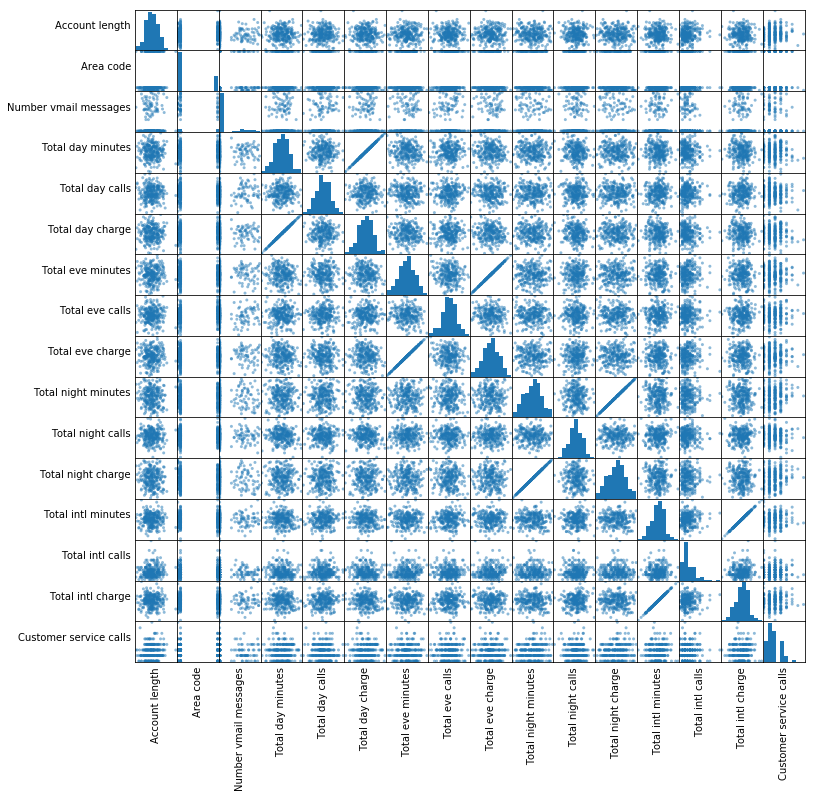

In [21]:
axs = pd.scatter_matrix(sampled_data, figsize=(12, 12))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

It’s hard to see. Let’s find correlation between independent variables and target variable.

It’s obvious that there aren’t highly correlated numeric variables. Therefore, we will keep all of them for the model.

In [32]:
"""
import six
for i in CV_data.columns:
    if not( isinstance(CV_data.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to churn for => ", i, CV_data.stat.corr('Churn',i))
"""

'\nimport six\nfor i in CV_data.columns:\n    if not( isinstance(CV_data.select(i).take(1)[0][0], six.string_types)):\n        print( "Correlation to churn for => ", i, CV_data.stat.corr(\'Churn\',i))\n'

## Preparing Data for Machine Learning
The process includes Category Indexing, One-Hot Encoding and VectorAssembler — a feature transformer that merges multiple columns into a vector column

### StringIndexer
StringIndexer encodes a string column of labels to a column of label indices. The indices are in [0, numLabels), ordered by label frequencies, so the most frequent label gets index 0.

In [33]:
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import UserDefinedFunction

CV_data = CV_data.drop("State").drop("Area code") \
                       .drop("Total day charge").drop("Total eve charge") \
                       .drop("Total night charge").drop("Total intl charge") \
                       .withColumn("Churn",
                                   CV_data["Churn"].cast(DoubleType())) \
                       .withColumn("International plan",
                                   CV_data["International plan"]
                                   .cast("boolean").cast(DoubleType())) \
                       .withColumn("Voice mail plan",
                                   CV_data["Voice mail plan"]
                                   .cast("boolean").cast(DoubleType()))
test_data = test_data.drop("State").drop("Area code") \
                       .drop("Total day charge").drop("Total eve charge") \
                       .drop("Total night charge").drop("Total intl charge") \
                       .withColumn("Churn",
                                   test_data["Churn"].cast(DoubleType())) \
                       .withColumn("International plan",
                                   test_data["International plan"]
                                   .cast("boolean").cast(DoubleType())) \
                       .withColumn("Voice mail plan",
                                   test_data["Voice mail plan"]
                                   .cast("boolean").cast(DoubleType()))

In [34]:
pd.DataFrame(CV_data.take(5), columns = CV_data.columns).transpose()

,0,1,2,3,4
Account length,128.0,107.0,137.0,84.0,75.0
International plan,0.0,0.0,0.0,1.0,1.0
Voice mail plan,1.0,1.0,0.0,0.0,0.0
Number vmail messages,25.0,26.0,0.0,0.0,0.0
Total day minutes,265.1,161.6,243.4,299.4,166.7
Total day calls,110.0,123.0,114.0,71.0,113.0
Total eve minutes,197.4,195.5,121.2,61.9,148.3
Total eve calls,99.0,103.0,110.0,88.0,122.0
Total night minutes,244.7,254.4,162.6,196.9,186.9
Total night calls,91.0,103.0,104.0,89.0,121.0


In [35]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [36]:
vecAssembler = VectorAssembler(inputCols = ['Account length', 'International plan', 'Voice mail plan', 'Number vmail messages', 
                                           'Total day minutes', 'Total day calls', 'Total eve minutes', 'Total eve calls', 
                                          'Total night minutes', 'Total night calls', 'Total intl minutes', 'Total intl calls', 
                                          'Customer service calls'], outputCol = 'features')

The above code basically indexes each categorical column using the StringIndexer, and then converts the indexed categories into one-hot encoded variables. The resulting output has the binary vectors appended to the end of each row.

Next, we will use the VectorAssembler to combine all the feature columns into a single vector column. This will include both the numeric columns and the one-hot encoded binary vector columns in our dataset.

In [37]:
df_train = vecAssembler.transform(CV_data)

In [38]:
pd.DataFrame(df_train.take(5), columns = df_train.columns).transpose()

,0,1,2,3,4
Account length,128,107,137,84,75
International plan,0,0,0,1,1
Voice mail plan,1,1,0,0,0
Number vmail messages,25,26,0,0,0
Total day minutes,265.1,161.6,243.4,299.4,166.7
Total day calls,110,123,114,71,113
Total eve minutes,197.4,195.5,121.2,61.9,148.3
Total eve calls,99,103,110,88,122
Total night minutes,244.7,254.4,162.6,196.9,186.9
Total night calls,91,103,104,89,121


# Decision Tree

In [39]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(labelCol = 'Churn', featuresCol = 'features')

In [40]:
pipeline = Pipeline(stages=[vecAssembler, dt])

In [41]:
model = pipeline.fit(CV_data)

In [42]:
predictions = model.transform(test_data)

In [43]:
predictions.select('prediction', 'Churn', 'features').toPandas().head(20)

,prediction,Churn,features
0,0.0,0.0,"[117.0, 0.0, 0.0, 0.0, 184.5, 97.0, 351.6, 80...."
1,1.0,1.0,"[65.0, 0.0, 0.0, 0.0, 129.1, 137.0, 228.5, 83...."
2,1.0,1.0,"[161.0, 0.0, 0.0, 0.0, 332.9, 67.0, 317.8, 97...."
3,0.0,0.0,"[111.0, 0.0, 0.0, 0.0, 110.4, 103.0, 137.3, 10..."
4,0.0,0.0,"[49.0, 0.0, 0.0, 0.0, 119.3, 117.0, 215.1, 109..."
5,0.0,0.0,"[36.0, 0.0, 1.0, 30.0, 146.3, 128.0, 162.5, 80..."
6,0.0,0.0,"[65.0, 0.0, 0.0, 0.0, 211.3, 120.0, 162.6, 122..."
7,0.0,1.0,"[119.0, 0.0, 0.0, 0.0, 159.1, 114.0, 231.3, 11..."
8,0.0,0.0,"[10.0, 0.0, 0.0, 0.0, 186.1, 112.0, 190.2, 66...."
9,0.0,0.0,"[68.0, 0.0, 0.0, 0.0, 148.8, 70.0, 246.5, 164...."


In [44]:
evaluator = BinaryClassificationEvaluator(labelCol = 'Churn', rawPredictionCol='prediction')

In [45]:
evaluator.evaluate(predictions)

0.8184302539565699

# DT_TUNNING

In [51]:
paramGrid = ParamGridBuilder().addGrid(dt.maxDepth, [2,3,4,5,6,7]).build()

# Set up 3-fold cross validation
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator, 
                          numFolds=5)

CV_model = crossval.fit(CV_data)

In [52]:
tree_model = CV_model.bestModel.stages[1]
print(tree_model)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_494a8bfbf2fc8cd49d73) of depth 7 with 121 nodes


# DT_PREDICTIONS_IMPROVMENTS

In [53]:
predictions_improved = CV_model.bestModel.transform(test_data)

In [54]:
predictions_improved.select('prediction', 'Churn', 'features').toPandas().head(20)

,prediction,Churn,features
0,0.0,0.0,"[117.0, 0.0, 0.0, 0.0, 184.5, 97.0, 351.6, 80...."
1,1.0,1.0,"[65.0, 0.0, 0.0, 0.0, 129.1, 137.0, 228.5, 83...."
2,1.0,1.0,"[161.0, 0.0, 0.0, 0.0, 332.9, 67.0, 317.8, 97...."
3,0.0,0.0,"[111.0, 0.0, 0.0, 0.0, 110.4, 103.0, 137.3, 10..."
4,0.0,0.0,"[49.0, 0.0, 0.0, 0.0, 119.3, 117.0, 215.1, 109..."
5,0.0,0.0,"[36.0, 0.0, 1.0, 30.0, 146.3, 128.0, 162.5, 80..."
6,0.0,0.0,"[65.0, 0.0, 0.0, 0.0, 211.3, 120.0, 162.6, 122..."
7,0.0,1.0,"[119.0, 0.0, 0.0, 0.0, 159.1, 114.0, 231.3, 11..."
8,0.0,0.0,"[10.0, 0.0, 0.0, 0.0, 186.1, 112.0, 190.2, 66...."
9,0.0,0.0,"[68.0, 0.0, 0.0, 0.0, 148.8, 70.0, 246.5, 164...."


In [55]:
evaluator.evaluate(predictions_improved)

0.8526683842473316

# Logistic Regression Classifier

In [58]:
# Buiding model
from pyspark.ml.classification import LogisticRegression
from time import time

# Build the model
t0 = time()
lr = LogisticRegression(featuresCol = 'features', labelCol = 'Churn')

pipeline = Pipeline(stages=[vecAssembler, lr])
#Training model on training data
lrModel = pipeline.fit(CV_data)

tt = time() - t0

print("Classifier trained in {} seconds".format(round(tt,3)))

Classifier trained in 1.364 seconds


In [59]:
predictions = model.transform(test_data)

In [60]:
predictions.select('prediction', 'Churn', 'features').toPandas().head(20)

,prediction,Churn,features
0,0.0,0.0,"[117.0, 0.0, 0.0, 0.0, 184.5, 97.0, 351.6, 80...."
1,1.0,1.0,"[65.0, 0.0, 0.0, 0.0, 129.1, 137.0, 228.5, 83...."
2,1.0,1.0,"[161.0, 0.0, 0.0, 0.0, 332.9, 67.0, 317.8, 97...."
3,0.0,0.0,"[111.0, 0.0, 0.0, 0.0, 110.4, 103.0, 137.3, 10..."
4,0.0,0.0,"[49.0, 0.0, 0.0, 0.0, 119.3, 117.0, 215.1, 109..."
5,0.0,0.0,"[36.0, 0.0, 1.0, 30.0, 146.3, 128.0, 162.5, 80..."
6,0.0,0.0,"[65.0, 0.0, 0.0, 0.0, 211.3, 120.0, 162.6, 122..."
7,0.0,1.0,"[119.0, 0.0, 0.0, 0.0, 159.1, 114.0, 231.3, 11..."
8,0.0,0.0,"[10.0, 0.0, 0.0, 0.0, 186.1, 112.0, 190.2, 66...."
9,0.0,0.0,"[68.0, 0.0, 0.0, 0.0, 148.8, 70.0, 246.5, 164...."


# Random Forest Classifier

In [65]:
from pyspark.ml.classification import RandomForestClassifier
from time import time

# Build the model
t0 = time()
classifier = RandomForestClassifier(labelCol = 'Churn', featuresCol = 'features')
pipeline = Pipeline(stages=[vecAssembler, classifier])
model = pipeline.fit(CV_data)

tt = time() - t0

print("Classifier trained in {} seconds".format(round(tt,3)))

Classifier trained in 0.454 seconds


In [66]:
predictions = model.transform(test_data)

In [67]:
predictions.select('prediction', 'Churn', 'features').toPandas().head(20)

,prediction,Churn,features
0,0.0,0.0,"[117.0, 0.0, 0.0, 0.0, 184.5, 97.0, 351.6, 80...."
1,1.0,1.0,"[65.0, 0.0, 0.0, 0.0, 129.1, 137.0, 228.5, 83...."
2,1.0,1.0,"[161.0, 0.0, 0.0, 0.0, 332.9, 67.0, 317.8, 97...."
3,0.0,0.0,"[111.0, 0.0, 0.0, 0.0, 110.4, 103.0, 137.3, 10..."
4,0.0,0.0,"[49.0, 0.0, 0.0, 0.0, 119.3, 117.0, 215.1, 109..."
5,0.0,0.0,"[36.0, 0.0, 1.0, 30.0, 146.3, 128.0, 162.5, 80..."
6,0.0,0.0,"[65.0, 0.0, 0.0, 0.0, 211.3, 120.0, 162.6, 122..."
7,0.0,1.0,"[119.0, 0.0, 0.0, 0.0, 159.1, 114.0, 231.3, 11..."
8,0.0,0.0,"[10.0, 0.0, 0.0, 0.0, 186.1, 112.0, 190.2, 66...."
9,0.0,0.0,"[68.0, 0.0, 0.0, 0.0, 148.8, 70.0, 246.5, 164...."


In [69]:
evaluator = BinaryClassificationEvaluator(labelCol = 'Churn', rawPredictionCol='prediction')

In [70]:
evaluator.evaluate(predictions)

0.8131670960618329

## Sample visualization of data with Plotly package

!pip install plotly  
!pip install cufflinks 

In [71]:
 !pip install cufflinks

    100% |████████████████████████████████| 61kB 80kB/s ta 0:00:011
    100% |████████████████████████████████| 30.1MB 681kB/s ta 0:00:01
  Running setup.py bdist_wheel for cufflinks ... done
  Stored in directory: /home/javeed/.cache/pip/wheels/10/78/8f/c9085ae409e556466c35584178fa7c3145c3265e7f324817fb
  Running setup.py bdist_wheel for plotly ... done
  Stored in directory: /home/javeed/.cache/pip/wheels/21/0f/61/fb0fe2124addb33fbceda237993ee152c24812c57576e77989
  Running setup.py bdist_wheel for colorlover ... done
  Stored in directory: /home/javeed/.cache/pip/wheels/fc/c3/f7/fde32e0d906ad64fe8011a823ea39e0197616116150f4a8376
  Running setup.py bdist_wheel for retrying ... done
  Stored in directory: /home/javeed/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built cufflinks plotly colorlover retrying
pyspark 2.3.1 requires py4j==0.10.7, which is not installed.


In [79]:
#!pip install plotly 


In [73]:
import sys
import pandas
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.graph_objs as go

init_notebook_mode(connected=True)
sys.path.append("".join([os.environ["HOME"]]))

/home/javeed/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


/home/javeed/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:531: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis




Plot a pie chart that shows the predicted churn split. !!! By most important features: Contract, MonthlyCharges !!! predicted vs observed churns.

In [74]:
cumulative_stats = predictions.groupby(['Churn']).count()
labels_data_plot = ['No','Yes']
values_data_plot = [cumulative_stats.select('count').collect()[x][0] for x in range(2)]

In [75]:
product_data = [go.Pie(
            labels=labels_data_plot,
            values=values_data_plot,
    )]

product_layout = go.Layout(
    title='Churn',
)

fig = go.Figure(data=product_data, layout=product_layout)
iplot(fig)

 Some analysis of Mean Monthly Charges per churn class

In [77]:
y_data_plot = [predictions.groupby(['Churn']).mean().collect()[x][3] for x in range(2)]

In [78]:
age_data = [go.Bar(
            y= y_data_plot,
            x= labels_data_plot
            
    )]

age_layout = go.Layout(
    title='Mean Monthly Charges per churn class',
    xaxis=dict(
        title = "Churn",
        showline=False,),
    yaxis=dict(
        title = "Mean Monthly Charges",
        ),
)

fig = go.Figure(data=age_data, layout=age_layout)
iplot(fig)

Based on the bar plot which we created, we might make the following conclusion: The mean monthly charges for churn customers is less than non-churn customers as we may expect.